In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()
from sklearn.cluster import KMeans

In [43]:
data = pd.read_csv('3.01.+Country+clusters.csv')

In [44]:
data 

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


### Plot the Data 

<function matplotlib.pyplot.show(close=None, block=None)>

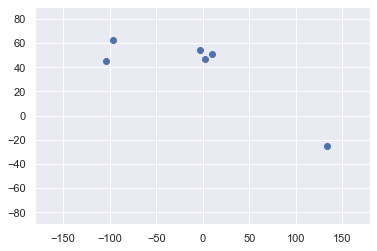

In [45]:
plt.scatter(data['Longitude'],data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90, 90)
plt.show

### Select the features 

In [46]:
x = data.iloc[:, 1:3]

In [47]:
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


### Clustering

In [48]:
kmeans = KMeans(2)

In [49]:
kmeans.fit(x)

KMeans(n_clusters=2)

### Clustering Results 

In [50]:
#the first five data points are in the same cluster 
#the last point is in cluster 1 
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 0, 0, 0, 1], dtype=int32)

In [51]:
#create a dataframe so you can see the clusters more clearly 
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


<function matplotlib.pyplot.show(close=None, block=None)>

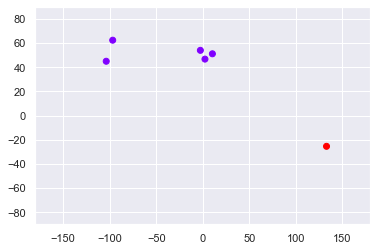

In [52]:
plt.scatter(data['Longitude'],data['Latitude'], c = data_with_clusters['Cluster'], cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90, 90)
plt.show

### with three clusters 

In [20]:
kmeans = KMeans(3)

In [21]:
kmeans.fit(x)

KMeans(n_clusters=3)

In [23]:
three_clusters = kmeans.fit_predict(x)
three_clusters

array([0, 0, 1, 1, 1, 2], dtype=int32)

In [24]:
data_with_clusters['Cluster3'] = three_clusters

<function matplotlib.pyplot.show(close=None, block=None)>

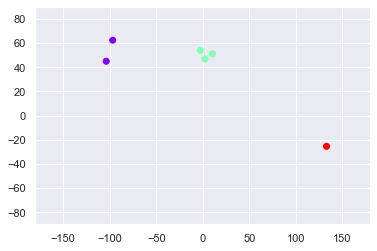

In [25]:
plt.scatter(data['Longitude'],data['Latitude'], c = data_with_clusters['Cluster3'], cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90, 90)
plt.show

### Clustering Categorical Data

### map the categorical column to numerical

In [27]:
data_mapped = data.copy()
data_mapped['Language']= data_mapped['Language'].map({'English':0, 'French':1, 'German':2})

In [28]:
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


### Select Features

In [30]:
x = data_mapped.iloc[:, 3:4]

In [31]:
x

,Language
0,0
1,0
2,1
3,0
4,2
5,0


### Clustering

In [35]:
kmeans = KMeans(3)

In [36]:
kmeans.fit(x)

KMeans(n_clusters=3)

In [37]:
cat_clusters = kmeans.fit_predict(x)
cat_clusters

array([0, 0, 2, 0, 1, 0], dtype=int32)

In [38]:
data_with_clusters['Cat_cluster'] = cat_clusters

<function matplotlib.pyplot.show(close=None, block=None)>

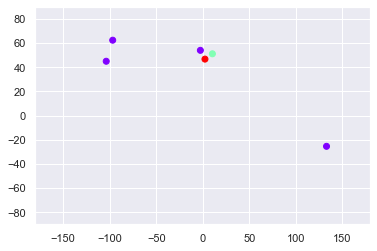

In [39]:
plt.scatter(data['Longitude'],data['Latitude'], c = data_with_clusters['Cat_cluster'], cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90, 90)
plt.show

### Selecting the number of clusters 

In [53]:
kmeans.inertia_

13205.758119999999

In [54]:
wcss=[]

for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [55]:
#the first number is the number per group for one cluster (42601)
#the second number is the number per group for two clusters 
#the third number is the number per group for three clusters 
wcss

[42601.91356666667,
 13205.758119999999,
 288.10523333333333,
 111.91233333333332,
 38.50624999999998,
 0.0]

### The Elbow Method

Text(0, 0.5, 'Within-cluster Sum of Squares')

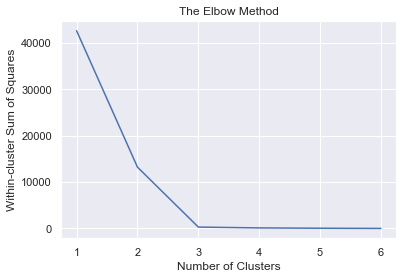

In [56]:
number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-cluster Sum of Squares')

### The options at the elbow are 2 or 3 clusters, three is the best choice

In [ ]:
### KMeans is sensitive to outliers 
### uses euclidean distance 
